In [2]:
#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

#Determine which features are continuous vs.  categorical. Drop rows without a valid sales price.

house_data = pd.read_csv('p556_hw1_q1_data.csv')
print(house_data.head())
print(house_data.columns)
print(house_data.describe())

#drop rows without a valid sales price
house_data = house_data.loc[house_data['price'] != 0]
house_data = house_data.drop(['date'], 'columns')
house_data.index = list(range(house_data['price'].count()))

house_data.head()


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Text(0.5, 1.0, 'price')

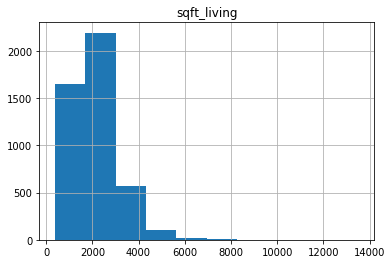

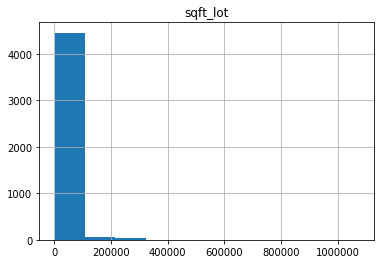

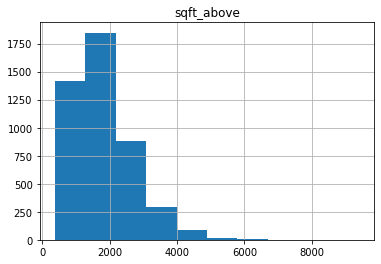

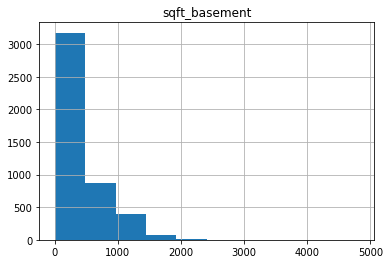

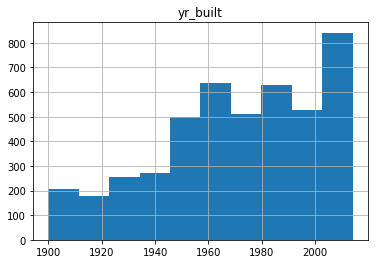

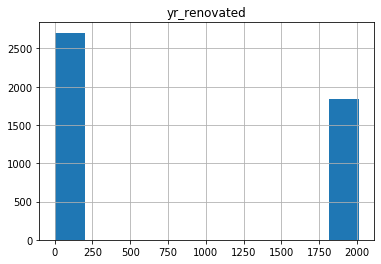

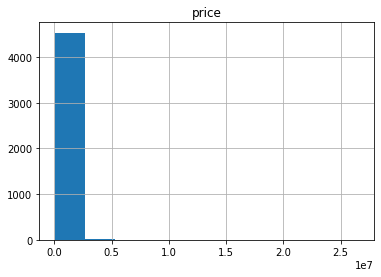

In [3]:
#Visualize the univariate distribution of each continuous variable, and the distribution of the target.
#Do you notice anything?  Is there something that might require special treatment?

cts_vars = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
cat_vars = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'street', 'city', 'statezip', 'country']

for var in cts_vars:
  plt.figure()
  house_data[var].hist()
  plt.title(var)

plt.figure()
house_data['price'].hist()
plt.title('price')

Text(0.5, 1.0, 'price')

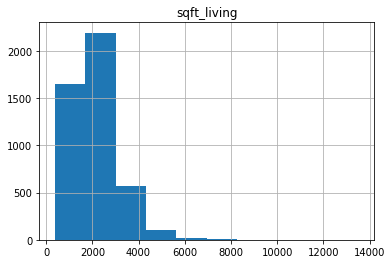

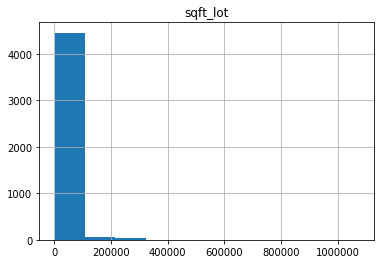

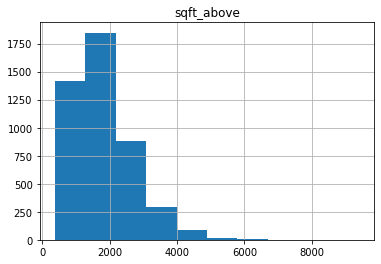

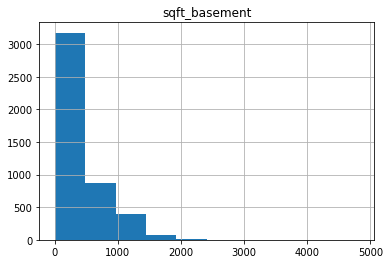

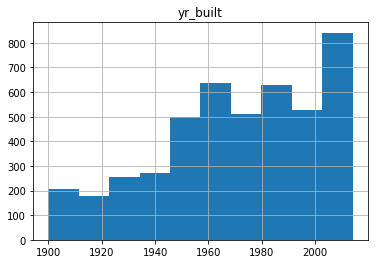

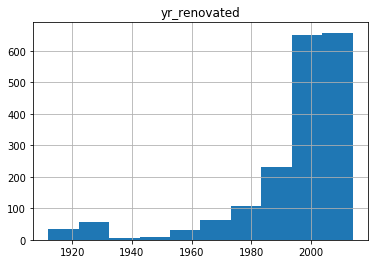

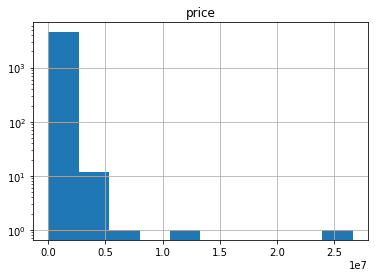

In [4]:
for var in cts_vars:
  plt.figure()
  if var == 'yr_renovated':
    house_data.loc[house_data[var] != 0][var].hist()
  else:
    house_data[var].hist()
  plt.title(var)

plt.figure()
house_data['price'].hist()
plt.yscale('log')
plt.title('price')

<Figure size 432x288 with 0 Axes>

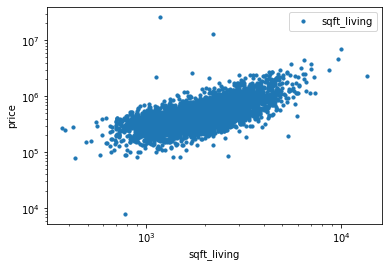

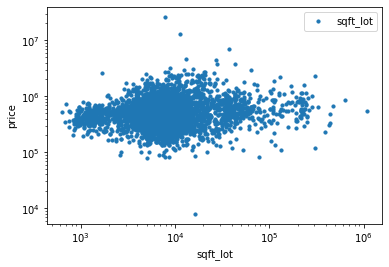

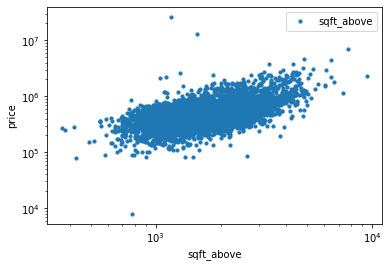

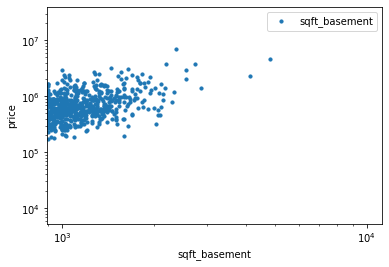

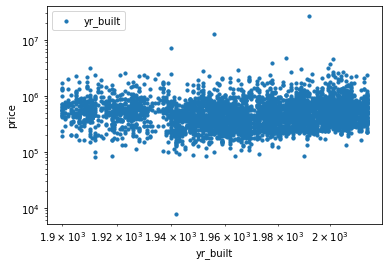

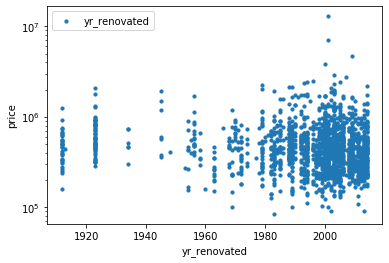

In [5]:
#Visualize the dependency of the target on each continuous feature (2d scatter plot).

plt.figure()
for var in cts_vars:
  if var != 'yr_renovated':
    house_data.plot.scatter(var, 'price', s=10, label=var)
    plt.xscale('log')
  else:
    house_data.loc[house_data['yr_renovated'] != 0].plot.scatter(var, 'price', s=10, label=var)
  plt.yscale('log')
plt.legend()

In [6]:
#check for missing input values
house_data.isnull().sum()

#Encode categorical variables.
#ColumnTransformer doesn't work with the names themselves, so use a pandas dataframe.

col_transf = make_column_transformer( (OneHotEncoder(dtype=int), cat_vars), remainder = 'drop')
arr = col_transf.fit_transform(house_data.drop(['price'] , 1), house_data['price']).toarray()
names = pd.get_dummies(house_data.drop(['price']+cts_vars, 1), columns=cat_vars).columns

pd_data = pd.DataFrame(arr, columns=names)
pd_data

X = pd.concat([house_data[x] for x in cts_vars]+[pd_data], 'columns')
y = house_data['price'] #target
X

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,bedrooms_0.0,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA
0,1340,7912,1340,0,1955,2005,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,3650,9050,3370,280,1921,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1930,11947,1930,0,1966,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2000,8030,1000,1000,1963,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1940,10500,1140,800,1976,1992,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,1510,6360,1510,0,1954,1979,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4547,1460,7573,1460,0,1983,2009,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4548,3010,7014,3010,0,2009,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4549,2090,6630,1070,1020,1974,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
#train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)
#Evaluate LinearRegression, Ridge, Lasso, Elasticnet
lin_reg = LinearRegression().fit(X_train, y_train)
ridge_reg = Ridge().fit(X_train, y_train)

In [16]:
lasso_reg = Lasso(tol=0.01).fit(X_train, y_train)

In [17]:
elasti_reg = ElasticNet(max_itertol=0.01).fit(X_train, y_train)

/Users/lvbenson/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453545919735818.6, tolerance: 11569582094033.006
  positive)
